# Credit Scoring CNN Modelling Version 1 (11/16)

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('./processed.csv')
df

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,576,1,1,7.509249,3.0,4.0,3.0,0,3.0,7.0,...,2,28.460148,26.822620,1,1,49.574949,21.465380,2,312.494089,2
1,576,2,1,7.509249,3.0,4.0,3.0,0,3.0,4.0,...,2,28.460148,31.944960,1,1,49.574949,21.465380,3,284.629162,2
2,576,3,1,7.509249,3.0,4.0,3.0,0,3.0,7.0,...,2,28.460148,28.609352,1,1,49.574949,21.465380,4,331.209863,2
3,576,4,1,7.509249,3.0,4.0,3.0,0,5.0,4.0,...,2,28.460148,31.377862,1,1,49.574949,21.465380,5,223.451310,2
4,576,5,1,7.509249,3.0,4.0,3.0,0,6.0,4.0,...,2,28.460148,24.797347,1,1,49.574949,21.465380,1,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9254,4,1,8.119522,4.0,6.0,7.0,0,23.0,7.0,...,2,22.413835,34.663572,1,1,35.104023,24.028477,0,479.866228,0
99996,9254,5,1,8.119522,4.0,6.0,7.0,0,18.0,7.0,...,2,22.413835,40.565631,1,1,35.104023,24.028477,1,496.651610,0
99997,9254,6,1,8.119522,4.0,6.0,7.0,0,27.0,6.0,...,2,22.413835,41.255522,1,1,35.104023,24.028477,0,516.809083,0
99998,9254,7,1,8.119522,4.0,6.0,7.0,0,20.0,6.0,...,2,22.413835,33.638208,1,1,35.104023,24.028477,3,319.164979,1


## DL

### CNN

In [5]:
df_dl = df.copy()

In [6]:
for col in df_dl.iloc[:, :-1].columns[df_dl.iloc[:, :-1].dtypes != 'float']:
    df_dl[col] = df_dl[col].astype(np.float64)

In [7]:
df_dl.dtypes

Customer_ID                 float64
Month                       float64
Age                         float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                  float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount       float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour           float64
Monthly_Balance             float64
Credit_Score                  int64
dtype: object

In [8]:
df_dl.select_dtypes('int')

,Credit_Score
0,2
1,2
2,2
3,2
4,2
...,...
99995,0
99996,0
99997,0
99998,1


In [9]:
train_df = df_dl[df_dl['Month'] <= 6]
test_df = df_dl[df_dl['Month'] > 6]

print(train_df.shape)
print(test_df.shape)

(75000, 22)
(25000, 22)


In [10]:
train_df

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,576.0,1.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,7.0,...,2.0,28.460148,26.822620,1.0,1.0,49.574949,21.465380,2.0,312.494089,2
1,576.0,2.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,4.0,...,2.0,28.460148,31.944960,1.0,1.0,49.574949,21.465380,3.0,284.629162,2
2,576.0,3.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,7.0,...,2.0,28.460148,28.609352,1.0,1.0,49.574949,21.465380,4.0,331.209863,2
3,576.0,4.0,1.0,7.509249,3.0,4.0,3.0,0.0,5.0,4.0,...,2.0,28.460148,31.377862,1.0,1.0,49.574949,21.465380,5.0,223.451310,2
4,576.0,5.0,1.0,7.509249,3.0,4.0,3.0,0.0,6.0,4.0,...,2.0,28.460148,24.797347,1.0,1.0,49.574949,21.465380,1.0,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,9254.0,2.0,1.0,8.119522,4.0,6.0,7.0,0.0,23.0,6.0,...,2.0,22.413835,29.135447,1.0,1.0,35.104023,24.028477,4.0,400.104466,1
99994,9254.0,3.0,1.0,8.119522,4.0,6.0,7.0,0.0,20.0,6.0,...,2.0,22.413835,39.323569,1.0,1.0,35.104023,24.028477,1.0,410.256158,0
99995,9254.0,4.0,1.0,8.119522,4.0,6.0,7.0,0.0,23.0,7.0,...,2.0,22.413835,34.663572,1.0,1.0,35.104023,24.028477,0.0,479.866228,0
99996,9254.0,5.0,1.0,8.119522,4.0,6.0,7.0,0.0,18.0,7.0,...,2.0,22.413835,40.565631,1.0,1.0,35.104023,24.028477,1.0,496.651610,0


In [11]:
X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(75000, 21)
(75000,)
(25000, 21)
(25000,)


In [12]:
X_train

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,576.0,1.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,7.0,...,4.0,2.0,28.460148,26.822620,1.0,1.0,49.574949,21.465380,2.0,312.494089
1,576.0,2.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,4.0,...,4.0,2.0,28.460148,31.944960,1.0,1.0,49.574949,21.465380,3.0,284.629162
2,576.0,3.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,7.0,...,4.0,2.0,28.460148,28.609352,1.0,1.0,49.574949,21.465380,4.0,331.209863
3,576.0,4.0,1.0,7.509249,3.0,4.0,3.0,0.0,5.0,4.0,...,4.0,2.0,28.460148,31.377862,1.0,1.0,49.574949,21.465380,5.0,223.451310
4,576.0,5.0,1.0,7.509249,3.0,4.0,3.0,0.0,6.0,4.0,...,4.0,2.0,28.460148,24.797347,1.0,1.0,49.574949,21.465380,1.0,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,9254.0,2.0,1.0,8.119522,4.0,6.0,7.0,0.0,23.0,6.0,...,3.0,2.0,22.413835,29.135447,1.0,1.0,35.104023,24.028477,4.0,400.104466
99994,9254.0,3.0,1.0,8.119522,4.0,6.0,7.0,0.0,20.0,6.0,...,3.0,2.0,22.413835,39.323569,1.0,1.0,35.104023,24.028477,1.0,410.256158
99995,9254.0,4.0,1.0,8.119522,4.0,6.0,7.0,0.0,23.0,7.0,...,3.0,2.0,22.413835,34.663572,1.0,1.0,35.104023,24.028477,0.0,479.866228
99996,9254.0,5.0,1.0,8.119522,4.0,6.0,7.0,0.0,18.0,7.0,...,3.0,2.0,22.413835,40.565631,1.0,1.0,35.104023,24.028477,1.0,496.651610


In [13]:
sample_size = X_train.shape[0]
num_features = X_train.shape[1]
input_dim = 1 # each feature is represented by 1 number

print('Before Reshaping... :')
print(X_train.shape)
print(X_test.shape)
print('\n')

X_train_reshape = np.reshape(X_train.values, newshape=(sample_size, num_features, input_dim))
X_test_reshape = np.reshape(X_test.values, newshape=(X_test.shape[0], num_features, input_dim))

print('After Reshaping... : ')
print(X_train_reshape.shape)
print(X_test_reshape.shape)

Before Reshaping... :
(75000, 21)
(25000, 21)


After Reshaping... : 
(75000, 21, 1)
(25000, 21, 1)


In [14]:
print("1 Sample shape:\n", X_train_reshape[0].shape)
print("An example sample:\n", X_train_reshape[0])

1 Sample shape:
 (21, 1)
An example sample:
 [[576.        ]
 [  1.        ]
 [  1.        ]
 [  7.50924942]
 [  3.        ]
 [  4.        ]
 [  3.        ]
 [  0.        ]
 [  3.        ]
 [  7.        ]
 [  0.        ]
 [  4.        ]
 [  2.        ]
 [ 28.46014758]
 [ 26.82261962]
 [  1.        ]
 [  1.        ]
 [ 49.57494921]
 [ 21.46538026]
 [  2.        ]
 [312.49408868]]


In [15]:
import tensorflow as tf
from time import time
from datetime import timedelta
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# loss와 accuracy 시각화를 위한 함수 정의
def plot_loss(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], 'b-', label='loss')
    plt.plot(history.history['val_loss'], 'g--', label='val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Val Loss')
    plt.legend()
    plt.show()

def plot_acc(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['acc'], 'b-', label='acc')
    plt.plot(history.history['val_acc'], 'g--', label='val_acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Val Accuracy')
    plt.legend()
    plt.show()

In [18]:
# 결과 재활용을 위한 시드 설정 함수 정의
import random
def set_seed(seed: int = 42) -> None:
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.experimental.numpy.random.seed(seed)
    # When running on the CuDNN backend, two further options must be set
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")

In [19]:
# 분류모델 결과 평가를 위한 혼동행렬 리포트 & 시각화 함수 정의
def clf_report_plot(y_true, X_test, model):

    result = model.predict(X_test)

    y_pred = []
    for pred in result:
        y_pred.append(np.argmax(pred))

    print(classification_report(y_true, y_pred, digits=4))

    # plt.rc('font', family='NanumGothicOTF') # For MacOS
    plt.rc('font', family='NanumGothic') # For Windows

    ax = plt.subplot()
    ax.figure.set_size_inches(10, 10)
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', ax=ax)

    ax.set_title('Confusion Matrix',fontsize=20, y=1.05)
    ax.set_xlabel('Predicted Labels', fontsize=15)
    ax.set_ylabel('True Labels', fontsize=15)

    ax.xaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    ax.yaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    plt.show()

In [20]:
from tensorflow.keras.models import Sequential, load_model, Model

from tensorflow.keras.layers import Dense, LSTM, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Input

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report

In [21]:
import os

In [22]:
num_classes = 3

In [23]:
set_seed(42)
model = Sequential()
model.add(Input(shape=(num_features, input_dim)))
model.add(Conv1D(256, kernel_size=2, activation='relu'))
# model.add(MaxPooling1D(pool_size=3, strides=1))
model.add(Dropout(0.3))
model.add(Conv1D(256, kernel_size=4, activation='relu'))

model.add(Dropout(0.3))
model.add(Conv1D(256, kernel_size=8, activation='relu'))
# model.add(Conv1D(64, kernel_size=4, strides=4, activation='relu'))
model.add(MaxPooling1D())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))


model.add(Dense(num_classes, activation='softmax'))

Random seed set as 42
Metal device set to: Apple M1 Pro


2022-11-17 08:31:57.652753: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-17 08:31:57.652886: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 256)           768       
                                                                 
 dropout (Dropout)           (None, 20, 256)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 256)           262400    
                                                                 
 dropout_1 (Dropout)         (None, 17, 256)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 10, 256)           524544    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 256)           0         
 )                                                               
                                                        

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('cnn_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [26]:
print('Algorithm starts learning.....')
start_time = time()

history = model.fit(X_train_reshape, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[es, mc] )

print("Learning Durations: ", timedelta(seconds=(time() - start_time)))

Algorithm starts learning.....
Epoch 1/50


/Users/ben/miniforge3/envs/tf_mini/lib/python3.8/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]
2022-11-17 08:32:07.036332: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-17 08:32:07.330192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 1.0210 - acc: 0.5617

2022-11-17 08:32:24.521702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_acc improved from -inf to 0.59387, saving model to cnn_best_model.h5
938/938 [==============================] - 20s 20ms/step - loss: 1.0210 - acc: 0.5617 - val_loss: 0.8485 - val_acc: 0.5939
Epoch 2/50
935/938 [============================>.] - ETA: 0s - loss: 0.9124 - acc: 0.5848
Epoch 2: val_acc did not improve from 0.59387
938/938 [==============================] - 18s 19ms/step - loss: 0.9127 - acc: 0.5846 - val_loss: 0.8506 - val_acc: 0.5775
Epoch 3/50
936/938 [============================>.] - ETA: 0s - loss: 0.9026 - acc: 0.5941
Epoch 3: val_acc improved from 0.59387 to 0.61613, saving model to cnn_best_model.h5
938/938 [==============================] - 18s 19ms/step - loss: 0.9026 - acc: 0.5941 - val_loss: 0.8218 - val_acc: 0.6161
Epoch 4/50
937/938 [============================>.] - ETA: 0s - loss: 0.8945 - acc: 0.6005
Epoch 4: val_acc improved from 0.61613 to 0.61887, saving model to cnn_best_model.h5
938/938 [==============================] - 18s 19ms/step - 

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


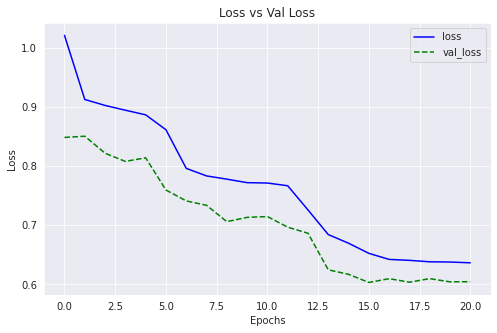

In [31]:
plot_loss(history)

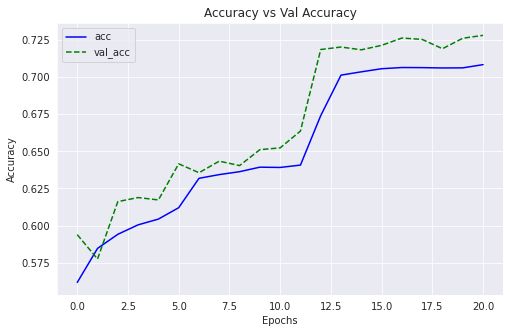

In [32]:
plot_acc(history)

In [33]:
best_model = load_model('./cnn_best_model.h5')
print('Test Accuracy: {}'.format(best_model.evaluate(X_test_reshape, y_test)[1]))

 14/782 [..............................] - ETA: 6s - loss: 0.7909 - acc: 0.6451

2022-11-17 08:39:13.239338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 6s 7ms/step - loss: 0.8037 - acc: 0.6239
Test Accuracy: 0.6238800287246704


(128일 때, 62.86%)

In [36]:
print("Train Accuracy: {}".format(best_model.evaluate(X_train_reshape, y_train)[1]))

2344/2344 [==============================] - 17s 7ms/step - loss: 0.6151 - acc: 0.7196
Train Accuracy: 0.7196266651153564


 50/782 [>.............................] - ETA: 2s

2022-11-17 08:39:25.359713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 3s 3ms/step
              precision    recall  f1-score   support

           0     0.6849    0.5387    0.6031      7216
           1     0.6802    0.6405    0.6598     12960
           2     0.4787    0.7067    0.5707      4824

    accuracy                         0.6239     25000
   macro avg     0.6146    0.6286    0.6112     25000
weighted avg     0.6427    0.6239    0.6262     25000



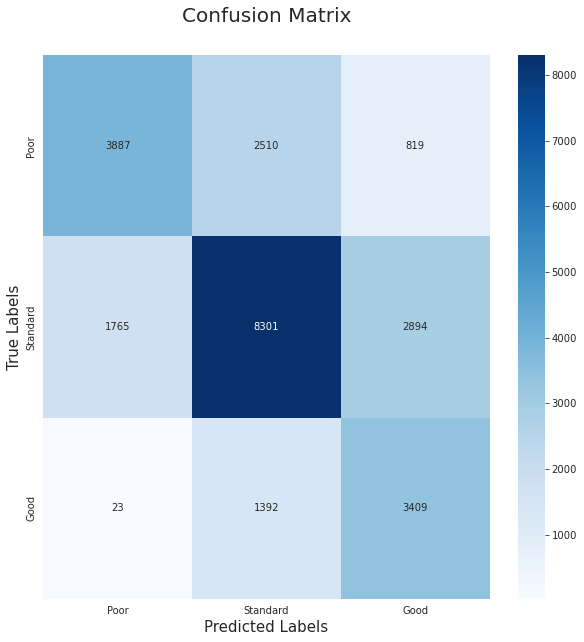

In [34]:
clf_report_plot(y_test, X_test_reshape, best_model)

## CNN 병렬모델

In [38]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, BatchNormalization, Concatenate, MaxPooling1D, GlobalMaxPooling1D

In [39]:
set_seed(42) # seed 설정

# Input layer 생성
input = Input(shape=(num_features, input_dim), name='input')
print('Input shape : ', input.shape)

# CNN
cnn1 = Conv1D(128, kernel_size=2, strides=1, padding='valid', activation='relu', name='conv1')(input) # kernel_size=2: 2개씩 feature 학습
print('cnn1 shape : ', cnn1.shape)
cnn1 = BatchNormalization(name='batch1')(cnn1)
# cnn1 = MaxPooling1D(name='max1')(cnn1)
cnn1 = GlobalMaxPooling1D(name='max1')(cnn1)
cnn1 = Dense(128, activation='relu')(cnn1)
cnn1 = Dropout(0.2, name='drop1')(cnn1)
print('cnn1 shape : ', cnn1.shape)

cnn2 = Conv1D(128, kernel_size=4, strides=1, padding='valid', activation='relu', name='conv2')(input) # kernel_size=4: 4개씩 feature 학습
print('cnn2 shape : ', cnn2.shape)
cnn2 = BatchNormalization(name='batch2')(cnn2)
# cnn2 = MaxPooling1D(name='max2')(cnn2)
cnn2 = GlobalMaxPooling1D(name='max2')(cnn2)
cnn2 = Dense(128, activation='relu')(cnn2)
cnn2 = Dropout(0.2, name='drop2')(cnn2)
print('cnn2 shape : ', cnn2.shape)

cnn3 = Conv1D(128, kernel_size=6, strides=1, padding='valid', activation='relu', name='conv3')(input) # kernel_size=4: 6개씩 feature 학습
print('cnn3 shape : ', cnn3.shape)
cnn3 = BatchNormalization(name='batch3')(cnn3)
# cnn3 = MaxPooling1D(name='max3')(cnn3)
cnn3 = GlobalMaxPooling1D(name='max3')(cnn3)
cnn3 = Dense(128, activation='relu')(cnn3)
cnn3 = Dropout(0.2, name='drop3')(cnn3)
print('cnn3 shape : ', cnn3.shape)

cnn_concat = Concatenate(name='cnn_concat')([cnn1, cnn2, cnn3])
print('After Concat shape :', cnn_concat.shape)

decoder = Dense(128, activation='relu')(cnn_concat)
decoder = Dropout(0.2, name='decoder_dropout')(decoder)
decoder = Dense(64, activation='relu')(cnn_concat)
output = Dense(num_classes, activation='softmax')(decoder)
print('output: ', output.shape)

model = Model(inputs=input, outputs=output)

Random seed set as 42
Input shape :  (None, 21, 1)
cnn1 shape :  (None, 20, 128)
cnn1 shape :  (None, 128)
cnn2 shape :  (None, 18, 128)
cnn2 shape :  (None, 128)
cnn3 shape :  (None, 16, 128)
cnn3 shape :  (None, 128)
After Concat shape : (None, 384)
output:  (None, 3)


In [40]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 21, 1)]      0           []                               
                                                                                                  
 conv1 (Conv1D)                 (None, 20, 128)      384         ['input[0][0]']                  
                                                                                                  
 conv2 (Conv1D)                 (None, 18, 128)      640         ['input[0][0]']                  
                                                                                                  
 conv3 (Conv1D)                 (None, 16, 128)      896         ['input[0][0]']                  
                                                                                              

In [41]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('concatenated_cnn_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [42]:
print('Algorithm starts learning.....')
start_time = time()

history = model.fit(X_train_reshape, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[es, mc] )

print("Learning Durations: ", timedelta(seconds=(time() - start_time)))

Algorithm starts learning.....
Epoch 1/50


/Users/ben/miniforge3/envs/tf_mini/lib/python3.8/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]
2022-11-17 08:43:13.475598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 0.8240 - acc: 0.6183

2022-11-17 08:43:32.504185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_acc improved from -inf to 0.63933, saving model to concatenated_cnn_best_model.h5
938/938 [==============================] - 21s 22ms/step - loss: 0.8240 - acc: 0.6183 - val_loss: 0.7613 - val_acc: 0.6393
Epoch 2/50
938/938 [==============================] - ETA: 0s - loss: 0.7078 - acc: 0.6743
Epoch 2: val_acc improved from 0.63933 to 0.69520, saving model to concatenated_cnn_best_model.h5
938/938 [==============================] - 20s 21ms/step - loss: 0.7078 - acc: 0.6743 - val_loss: 0.7091 - val_acc: 0.6952
Epoch 3/50
938/938 [==============================] - ETA: 0s - loss: 0.6805 - acc: 0.6920
Epoch 3: val_acc improved from 0.69520 to 0.71740, saving model to concatenated_cnn_best_model.h5
938/938 [==============================] - 20s 22ms/step - loss: 0.6805 - acc: 0.6920 - val_loss: 0.6462 - val_acc: 0.7174
Epoch 4/50
936/938 [============================>.] - ETA: 0s - loss: 0.6702 - acc: 0.6996
Epoch 4: val_acc did not improve from 0.71740
938/938 [===========

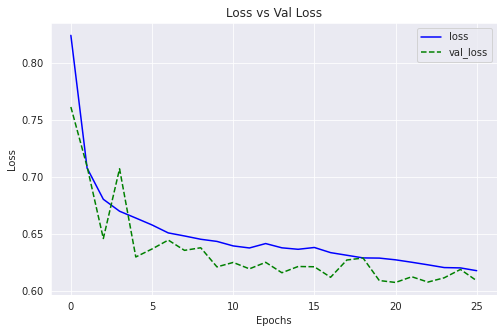

In [43]:
plot_loss(history)

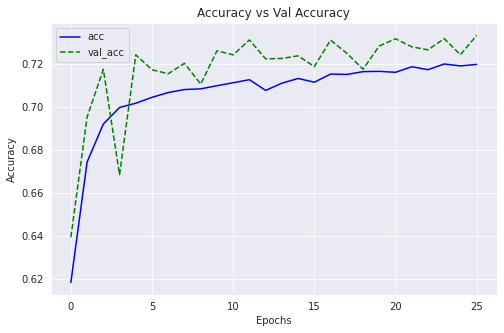

In [44]:
plot_acc(history)

In [45]:
best_model = load_model('./concatenated_cnn_best_model.h5')
print('Test Accuracy: {}'.format(best_model.evaluate(X_test_reshape, y_test)[1]))

2022-11-17 08:52:41.468875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 6s 8ms/step - loss: 0.8082 - acc: 0.6310
Test Accuracy: 0.6310000419616699


In [46]:
print("Train Accuracy: {}".format(best_model.evaluate(X_train_reshape, y_train)[1]))

2344/2344 [==============================] - 18s 8ms/step - loss: 0.6052 - acc: 0.7280
Train Accuracy: 0.7279999852180481


(Before adding dense decoder : test accuracy - 0.6286)

 19/782 [..............................] - ETA: 4s

2022-11-17 08:53:10.838772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 3s 4ms/step
              precision    recall  f1-score   support

           0     0.6763    0.5704    0.6189      7216
           1     0.6925    0.6410    0.6658     12960
           2     0.4845    0.6947    0.5708      4824

    accuracy                         0.6310     25000
   macro avg     0.6178    0.6354    0.6185     25000
weighted avg     0.6477    0.6310    0.6339     25000



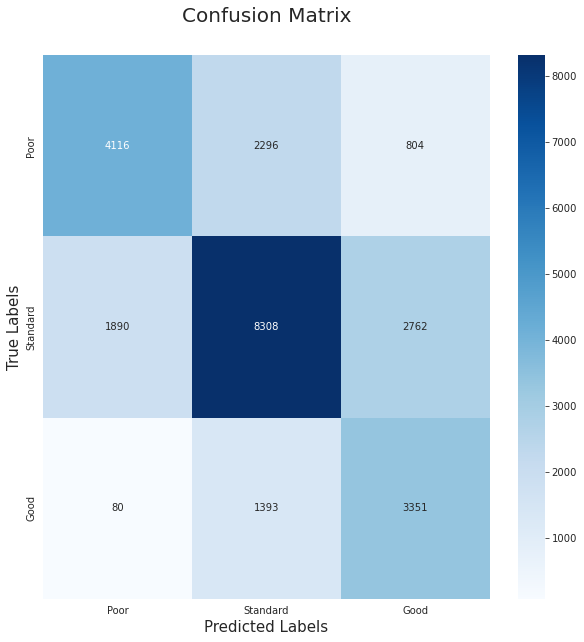

In [47]:
clf_report_plot(y_test, X_test_reshape, best_model)

# Validation 직접 설정 (Validation: 6월달 데이터)

### CNN

In [48]:
train_df = df_dl[df_dl['Month'] <= 5]
val_df = df_dl[df_dl['Month'] == 6]
test_df = df_dl[df_dl['Month'] > 6]

print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(62500, 22)
(12500, 22)
(25000, 22)


In [49]:
train_df

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,576.0,1.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,7.0,...,2.0,28.460148,26.822620,1.0,1.0,49.574949,21.465380,2.0,312.494089,2
1,576.0,2.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,4.0,...,2.0,28.460148,31.944960,1.0,1.0,49.574949,21.465380,3.0,284.629162,2
2,576.0,3.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,7.0,...,2.0,28.460148,28.609352,1.0,1.0,49.574949,21.465380,4.0,331.209863,2
3,576.0,4.0,1.0,7.509249,3.0,4.0,3.0,0.0,5.0,4.0,...,2.0,28.460148,31.377862,1.0,1.0,49.574949,21.465380,5.0,223.451310,2
4,576.0,5.0,1.0,7.509249,3.0,4.0,3.0,0.0,6.0,4.0,...,2.0,28.460148,24.797347,1.0,1.0,49.574949,21.465380,1.0,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,9254.0,1.0,1.0,8.119522,4.0,6.0,7.0,0.0,23.0,6.0,...,2.0,22.413835,32.991333,1.0,1.0,35.104023,24.028477,5.0,189.641080,0
99993,9254.0,2.0,1.0,8.119522,4.0,6.0,7.0,0.0,23.0,6.0,...,2.0,22.413835,29.135447,1.0,1.0,35.104023,24.028477,4.0,400.104466,1
99994,9254.0,3.0,1.0,8.119522,4.0,6.0,7.0,0.0,20.0,6.0,...,2.0,22.413835,39.323569,1.0,1.0,35.104023,24.028477,1.0,410.256158,0
99995,9254.0,4.0,1.0,8.119522,4.0,6.0,7.0,0.0,23.0,7.0,...,2.0,22.413835,34.663572,1.0,1.0,35.104023,24.028477,0.0,479.866228,0


In [50]:
X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
X_val, y_val = val_df.iloc[:, :-1], val_df.iloc[:, -1]
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]

print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)

print(X_test.shape)
print(y_test.shape)

(62500, 21)
(62500,)
(12500, 21)
(12500,)
(25000, 21)
(25000,)


In [51]:
X_train

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,576.0,1.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,7.0,...,4.0,2.0,28.460148,26.822620,1.0,1.0,49.574949,21.465380,2.0,312.494089
1,576.0,2.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,4.0,...,4.0,2.0,28.460148,31.944960,1.0,1.0,49.574949,21.465380,3.0,284.629162
2,576.0,3.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,7.0,...,4.0,2.0,28.460148,28.609352,1.0,1.0,49.574949,21.465380,4.0,331.209863
3,576.0,4.0,1.0,7.509249,3.0,4.0,3.0,0.0,5.0,4.0,...,4.0,2.0,28.460148,31.377862,1.0,1.0,49.574949,21.465380,5.0,223.451310
4,576.0,5.0,1.0,7.509249,3.0,4.0,3.0,0.0,6.0,4.0,...,4.0,2.0,28.460148,24.797347,1.0,1.0,49.574949,21.465380,1.0,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,9254.0,1.0,1.0,8.119522,4.0,6.0,7.0,0.0,23.0,6.0,...,3.0,2.0,22.413835,32.991333,1.0,1.0,35.104023,24.028477,5.0,189.641080
99993,9254.0,2.0,1.0,8.119522,4.0,6.0,7.0,0.0,23.0,6.0,...,3.0,2.0,22.413835,29.135447,1.0,1.0,35.104023,24.028477,4.0,400.104466
99994,9254.0,3.0,1.0,8.119522,4.0,6.0,7.0,0.0,20.0,6.0,...,3.0,2.0,22.413835,39.323569,1.0,1.0,35.104023,24.028477,1.0,410.256158
99995,9254.0,4.0,1.0,8.119522,4.0,6.0,7.0,0.0,23.0,7.0,...,3.0,2.0,22.413835,34.663572,1.0,1.0,35.104023,24.028477,0.0,479.866228


In [52]:
sample_size = X_train.shape[0]
num_features = X_train.shape[1]
input_dim = 1 # each feature is represented by 1 number

print('Before Reshaping... :')
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print('\n')

X_train_reshape = np.reshape(X_train.values, newshape=(sample_size, num_features, input_dim))
X_val_reshape = np.reshape(X_val.values, newshape=(X_val.shape[0], num_features, input_dim))
X_test_reshape = np.reshape(X_test.values, newshape=(X_test.shape[0], num_features, input_dim))

print('After Reshaping... : ')
print(X_train_reshape.shape)
print(X_val_reshape.shape)
print(X_test_reshape.shape)

Before Reshaping... :
(62500, 21)
(12500, 21)
(25000, 21)


After Reshaping... : 
(62500, 21, 1)
(12500, 21, 1)
(25000, 21, 1)


In [53]:
print("1 Sample shape:\n", X_train_reshape[0].shape)
print("An example sample:\n", X_train_reshape[0])

1 Sample shape:
 (21, 1)
An example sample:
 [[576.        ]
 [  1.        ]
 [  1.        ]
 [  7.50924942]
 [  3.        ]
 [  4.        ]
 [  3.        ]
 [  0.        ]
 [  3.        ]
 [  7.        ]
 [  0.        ]
 [  4.        ]
 [  2.        ]
 [ 28.46014758]
 [ 26.82261962]
 [  1.        ]
 [  1.        ]
 [ 49.57494921]
 [ 21.46538026]
 [  2.        ]
 [312.49408868]]


In [54]:
import tensorflow as tf
from time import time
from datetime import timedelta
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# loss와 accuracy 시각화를 위한 함수 정의
def plot_loss(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], 'b-', label='loss')
    plt.plot(history.history['val_loss'], 'g--', label='val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Val Loss')
    plt.legend()
    plt.show()

def plot_acc(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['acc'], 'b-', label='acc')
    plt.plot(history.history['val_acc'], 'g--', label='val_acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Val Accuracy')
    plt.legend()
    plt.show()

In [57]:
# 결과 재활용을 위한 시드 설정 함수 정의
import random
def set_seed(seed: int = 42) -> None:
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.experimental.numpy.random.seed(seed)
    # When running on the CuDNN backend, two further options must be set
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")

In [58]:
# 분류모델 결과 평가를 위한 혼동행렬 리포트 & 시각화 함수 정의
def clf_report_plot(y_true, X_test, model):

    result = model.predict(X_test)

    y_pred = []
    for pred in result:
        y_pred.append(np.argmax(pred))

    print(classification_report(y_true, y_pred, digits=4))

    # plt.rc('font', family='NanumGothicOTF') # For MacOS
    plt.rc('font', family='NanumGothic') # For Windows

    ax = plt.subplot()
    ax.figure.set_size_inches(10, 10)
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', ax=ax)

    ax.set_title('Confusion Matrix',fontsize=20, y=1.05)
    ax.set_xlabel('Predicted Labels', fontsize=15)
    ax.set_ylabel('True Labels', fontsize=15)

    ax.xaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    ax.yaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    plt.show()

In [59]:
from tensorflow.keras.models import Sequential, load_model, Model

from tensorflow.keras.layers import Dense, LSTM, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Input

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report

In [60]:
import os

In [61]:
num_classes = 3

In [62]:
set_seed(42)
model = Sequential()
model.add(Input(shape=(num_features, input_dim)))
model.add(Conv1D(256, kernel_size=2, activation='relu'))
# model.add(MaxPooling1D(pool_size=3, strides=1))
model.add(Dropout(0.3))
model.add(Conv1D(256, kernel_size=4, activation='relu'))

model.add(Dropout(0.3))
model.add(Conv1D(256, kernel_size=8, activation='relu'))
# model.add(Conv1D(64, kernel_size=4, strides=4, activation='relu'))
model.add(MaxPooling1D())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))


model.add(Dense(num_classes, activation='softmax'))

Random seed set as 42


In [63]:
# set_seed(42)
# model = Sequential()
# model.add(Input(shape=(num_features, input_dim)))
# model.add(Conv1D(128, kernel_size=2, activation='relu'))
# # model.add(MaxPooling1D(pool_size=3, strides=1))
# model.add(Dropout(0.3))
# model.add(Conv1D(128, kernel_size=4, activation='relu'))
#
# model.add(Dropout(0.3))
# model.add(Conv1D(128, kernel_size=8, activation='relu'))
# # model.add(Conv1D(64, kernel_size=4, strides=4, activation='relu'))
# model.add(MaxPooling1D())
# model.add(Dropout(0.3))
#
# model.add(Flatten())
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.3))
#
#
# model.add(Dense(num_classes, activation='softmax'))

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 20, 256)           768       
                                                                 
 dropout_4 (Dropout)         (None, 20, 256)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 17, 256)           262400    
                                                                 
 dropout_5 (Dropout)         (None, 17, 256)           0         
                                                                 
 conv1d_5 (Conv1D)           (None, 10, 256)           524544    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 256)           0         
 1D)                                                             
                                                      

In [65]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('cnn_best_model_2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [66]:
print('Algorithm starts learning.....')
start_time = time()

history = model.fit(X_train_reshape, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[es, mc] )

print("Learning Durations: ", timedelta(seconds=(time() - start_time)))

Algorithm starts learning.....
Epoch 1/50


2022-11-17 08:56:00.708040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


977/977 [==============================] - ETA: 0s - loss: 1.0130 - acc: 0.5704

2022-11-17 08:56:18.742997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_acc improved from -inf to 0.51448, saving model to cnn_best_model_2.h5
977/977 [==============================] - 20s 20ms/step - loss: 1.0130 - acc: 0.5704 - val_loss: 0.9067 - val_acc: 0.5145
Epoch 2/50
977/977 [==============================] - ETA: 0s - loss: 0.9016 - acc: 0.5914
Epoch 2: val_acc improved from 0.51448 to 0.59112, saving model to cnn_best_model_2.h5
977/977 [==============================] - 20s 20ms/step - loss: 0.9016 - acc: 0.5914 - val_loss: 0.8790 - val_acc: 0.5911
Epoch 3/50
977/977 [==============================] - ETA: 0s - loss: 0.8897 - acc: 0.6006
Epoch 3: val_acc did not improve from 0.59112
977/977 [==============================] - 19s 19ms/step - loss: 0.8897 - acc: 0.6006 - val_loss: 0.8829 - val_acc: 0.5224
Epoch 4/50
976/977 [============================>.] - ETA: 0s - loss: 0.8786 - acc: 0.6075
Epoch 4: val_acc did not improve from 0.59112
977/977 [==============================] - 20s 20ms/step - loss: 0.8786 - acc: 0.6076 - val_lo

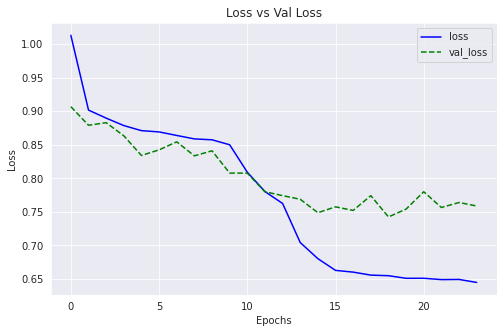

In [67]:
plot_loss(history)

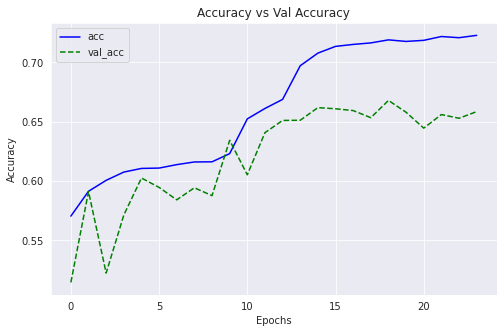

In [68]:
plot_acc(history)

In [69]:
best_model = load_model('./cnn_best_model_2.h5')
print('Test Accuracy: {}'.format(best_model.evaluate(X_test_reshape, y_test)[1]))

 12/782 [..............................] - ETA: 7s - loss: 0.7835 - acc: 0.6328

2022-11-17 09:03:34.775652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 6s 7ms/step - loss: 0.8153 - acc: 0.6354
Test Accuracy: 0.635360062122345


In [70]:
print('Train Accuracy: {}'.format(best_model.evaluate(X_train_reshape, y_train)[1]))

1954/1954 [==============================] - 14s 7ms/step - loss: 0.6092 - acc: 0.7284
Train Accuracy: 0.7284479737281799


 47/782 [>.............................] - ETA: 2s

2022-11-17 09:03:54.733116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 3s 3ms/step
              precision    recall  f1-score   support

           0     0.6827    0.5571    0.6136      7216
           1     0.6190    0.8074    0.7008     12960
           2     0.6343    0.2902    0.3982      4824

    accuracy                         0.6354     25000
   macro avg     0.6454    0.5516    0.5708     25000
weighted avg     0.6404    0.6354    0.6172     25000



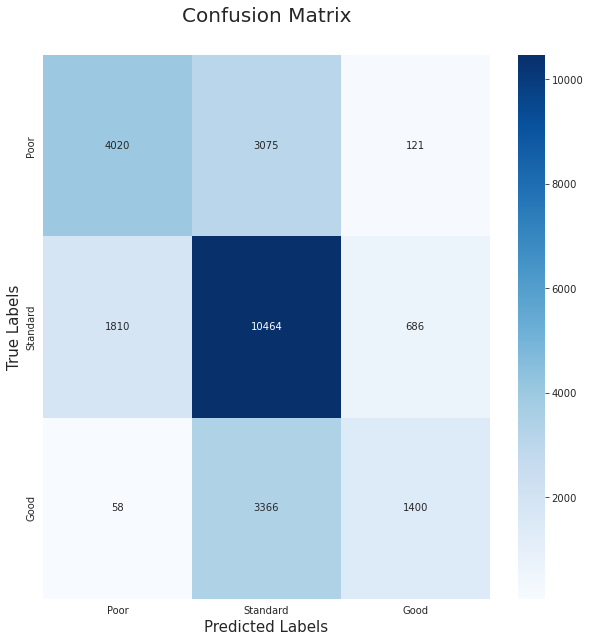

In [71]:
clf_report_plot(y_test, X_test_reshape, best_model)

## CNN 병렬모델

In [72]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, BatchNormalization, Concatenate, MaxPooling1D, GlobalMaxPooling1D

In [73]:
set_seed(42) # seed 설정

# Input layer 생성
input = Input(shape=(num_features, input_dim), name='input')
print('Input shape : ', input.shape)

# CNN
cnn1 = Conv1D(128, kernel_size=2, strides=1, padding='valid', activation='relu', name='conv1')(input) # kernel_size=2: 2개씩 feature 학습
print('cnn1 shape : ', cnn1.shape)
cnn1 = BatchNormalization(name='batch1')(cnn1)
# cnn1 = MaxPooling1D(name='max1')(cnn1)
cnn1 = GlobalMaxPooling1D(name='max1')(cnn1)
cnn1 = Dense(128, activation='relu')(cnn1)
cnn1 = Dropout(0.2, name='drop1')(cnn1)
print('cnn1 shape : ', cnn1.shape)

cnn2 = Conv1D(128, kernel_size=4, strides=1, padding='valid', activation='relu', name='conv2')(input) # kernel_size=4: 4개씩 feature 학습
print('cnn2 shape : ', cnn2.shape)
cnn2 = BatchNormalization(name='batch2')(cnn2)
# cnn2 = MaxPooling1D(name='max2')(cnn2)
cnn2 = GlobalMaxPooling1D(name='max2')(cnn2)
cnn2 = Dense(128, activation='relu')(cnn2)
cnn2 = Dropout(0.2, name='drop2')(cnn2)
print('cnn2 shape : ', cnn2.shape)

cnn3 = Conv1D(128, kernel_size=6, strides=1, padding='valid', activation='relu', name='conv3')(input) # kernel_size=4: 6개씩 feature 학습
print('cnn3 shape : ', cnn3.shape)
cnn3 = BatchNormalization(name='batch3')(cnn3)
# cnn3 = MaxPooling1D(name='max3')(cnn3)
cnn3 = GlobalMaxPooling1D(name='max3')(cnn3)
cnn3 = Dense(128, activation='relu')(cnn3)
cnn3 = Dropout(0.2, name='drop3')(cnn3)
print('cnn3 shape : ', cnn3.shape)

cnn_concat = Concatenate(name='cnn_concat')([cnn1, cnn2, cnn3])
print('After Concat shape :', cnn_concat.shape)

decoder = Dense(128, activation='relu')(cnn_concat)
decoder = Dropout(0.2, name='decoder_dropout')(decoder)
decoder = Dense(64, activation='relu')(cnn_concat)
output = Dense(num_classes, activation='softmax')(decoder)
print('output: ', output.shape)

model = Model(inputs=input, outputs=output)

Random seed set as 42
Input shape :  (None, 21, 1)
cnn1 shape :  (None, 20, 128)
cnn1 shape :  (None, 128)
cnn2 shape :  (None, 18, 128)
cnn2 shape :  (None, 128)
cnn3 shape :  (None, 16, 128)
cnn3 shape :  (None, 128)
After Concat shape : (None, 384)
output:  (None, 3)


In [74]:
# set_seed(42) # seed 설정
#
# # Input layer 생성
# input = Input(shape=(num_features, input_dim), name='input')
# print('Input shape : ', input.shape)
#
# # CNN
# cnn1 = Conv1D(128, kernel_size=2, strides=1, padding='valid', activation='relu', name='conv1')(input) # kernel_size=2: 2개씩 feature 학습
# print('cnn1 shape : ', cnn1.shape)
# cnn1 = BatchNormalization(name='batch1')(cnn1)
# # cnn1 = MaxPooling1D(name='max1')(cnn1)
# cnn1 = GlobalMaxPooling1D(name='max1')(cnn1)
# cnn1 = Dropout(0.2, name='drop1')(cnn1)
# print('cnn1 shape : ', cnn1.shape)
#
# cnn2 = Conv1D(128, kernel_size=4, strides=1, padding='valid', activation='relu', name='conv2')(input) # kernel_size=4: 4개씩 feature 학습
# print('cnn2 shape : ', cnn2.shape)
# cnn2 = BatchNormalization(name='batch2')(cnn2)
# # cnn2 = MaxPooling1D(name='max2')(cnn2)
# cnn2 = GlobalMaxPooling1D(name='max2')(cnn2)
# cnn2 = Dropout(0.2, name='drop2')(cnn2)
# print('cnn2 shape : ', cnn2.shape)
#
# cnn3 = Conv1D(128, kernel_size=6, strides=1, padding='valid', activation='relu', name='conv3')(input) # kernel_size=4: 6개씩 feature 학습
# print('cnn3 shape : ', cnn3.shape)
# cnn3 = BatchNormalization(name='batch3')(cnn3)
# # cnn3 = MaxPooling1D(name='max3')(cnn3)
# cnn3 = GlobalMaxPooling1D(name='max3')(cnn3)
# cnn3 = Dropout(0.2, name='drop3')(cnn3)
# print('cnn3 shape : ', cnn3.shape)
#
# cnn_concat = Concatenate(name='cnn_concat')([cnn1, cnn2, cnn3])
# print('After Concat shape :', cnn_concat.shape)
#
# decoder = Dense(128, activation='relu')(cnn_concat)
# decoder = Dropout(0.2, name='decoder_dropout')(decoder)
# decoder = Dense(64, activation='relu')(cnn_concat)
# output = Dense(num_classes, activation='softmax')(decoder)
#
# print('output: ', output.shape)
# model = Model(inputs=input, outputs=output)

In [75]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 21, 1)]      0           []                               
                                                                                                  
 conv1 (Conv1D)                 (None, 20, 128)      384         ['input[0][0]']                  
                                                                                                  
 conv2 (Conv1D)                 (None, 18, 128)      640         ['input[0][0]']                  
                                                                                                  
 conv3 (Conv1D)                 (None, 16, 128)      896         ['input[0][0]']                  
                                                                                            

In [76]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('concatenated_cnn_best_model_2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [77]:
print('Algorithm starts learning.....')
start_time = time()

history = model.fit(X_train_reshape, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[es, mc] )

print("Learning Durations: ", timedelta(seconds=(time() - start_time)))

Algorithm starts learning.....
Epoch 1/50


2022-11-17 09:03:58.363920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


977/977 [==============================] - ETA: 0s - loss: 0.7986 - acc: 0.6319

2022-11-17 09:04:19.258796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_acc improved from -inf to 0.62264, saving model to concatenated_cnn_best_model_2.h5
977/977 [==============================] - 23s 23ms/step - loss: 0.7986 - acc: 0.6319 - val_loss: 0.8286 - val_acc: 0.6226
Epoch 2/50
976/977 [============================>.] - ETA: 0s - loss: 0.6840 - acc: 0.6864
Epoch 2: val_acc improved from 0.62264 to 0.64664, saving model to concatenated_cnn_best_model_2.h5
977/977 [==============================] - 21s 21ms/step - loss: 0.6840 - acc: 0.6864 - val_loss: 0.8048 - val_acc: 0.6466
Epoch 3/50
976/977 [============================>.] - ETA: 0s - loss: 0.6568 - acc: 0.7020
Epoch 3: val_acc improved from 0.64664 to 0.65920, saving model to concatenated_cnn_best_model_2.h5
977/977 [==============================] - 20s 21ms/step - loss: 0.6569 - acc: 0.7020 - val_loss: 0.7948 - val_acc: 0.6592
Epoch 4/50
976/977 [============================>.] - ETA: 0s - loss: 0.6443 - acc: 0.7098
Epoch 4: val_acc did not improve from 0.65920
977/977 [=====

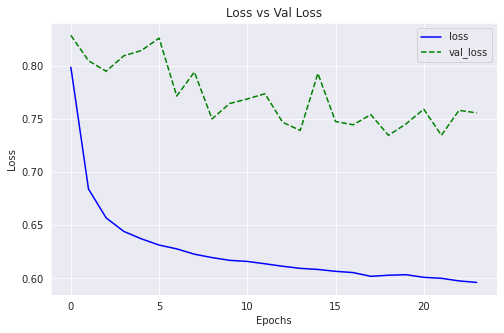

In [78]:
plot_loss(history)

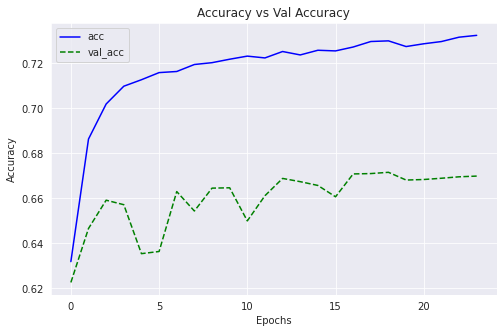

In [79]:
plot_acc(history)

In [80]:
best_model = load_model('./concatenated_cnn_best_model_2.h5')
print('Test Accuracy: {}'.format(best_model.evaluate(X_test_reshape, y_test)[1]))

  4/782 [..............................] - ETA: 13s - loss: 0.7524 - acc: 0.6328 

2022-11-17 09:12:05.529457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 6s 8ms/step - loss: 0.8204 - acc: 0.6262
Test Accuracy: 0.6261600255966187


In [82]:
print('Train Accuracy: {}'.format(best_model.evaluate(X_train_reshape, y_train)[1]))

1954/1954 [==============================] - 16s 8ms/step - loss: 0.5926 - acc: 0.7330
Train Accuracy: 0.7330080270767212


In [ ]:
clf_report_plot(y_test, X_test_reshape, best_model)

Predict Probabilities

In [84]:
result = best_model.predict(X_train_reshape)

1954/1954 [==============================] - 7s 4ms/step


In [86]:
performance_list = []
performance_list.append(result)
print(performance_list)

[array([[0.02734532, 0.29905915, 0.67359555],
       [0.02378798, 0.33618578, 0.6400262 ],
       [0.03116329, 0.30505085, 0.6637858 ],
       ...,
       [0.47341737, 0.32990038, 0.19668224],
       [0.59580123, 0.27819887, 0.12599994],
       [0.31709978, 0.3652758 , 0.3176245 ]], dtype=float32), array([[0.02734532, 0.29905915, 0.67359555],
       [0.02378798, 0.33618578, 0.6400262 ],
       [0.03116329, 0.30505085, 0.6637858 ],
       ...,
       [0.47341737, 0.32990038, 0.19668224],
       [0.59580123, 0.27819887, 0.12599994],
       [0.31709978, 0.3652758 , 0.3176245 ]], dtype=float32)]
